## Importing Necessary Packages

In [1]:
import dask
import pystac_client
import planetary_computer
import leafmap
import geogif
import stackstac
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from avgNdwi import main
from scipy.stats import gaussian_kde
import utils as ut

## Starting a Dask Cluster
#### Click the link to see the Dask visual when processing in another tab

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 13.65 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42225,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 13.65 GiB
Comm: tcp://127.0.0.1:44757,Total threads: 2
Dashboard: http://127.0.0.1:40891/status,Memory: 3.41 GiB
Nanny: tcp://127.0.0.1:33399,


## Input Years, Bounding Box, and Percent Cloud Cover
#### Syntax for bounding box: (minimum longitude, minimum latitude, maximum longitude, maximum latitude)
#### Input the percent cloudcover to be considered

In [3]:
# bounding box in Worcester county
bbox = (-71.882047, 42.0215975, -71.72, 42.299624)
start = '2015'
end = '2024'
cloudcover = 10

## Run get_bands to get landsat 8 and 9 imagery
#### The earliest starting year is 2013

In [4]:
ndvi, lst = ut.get_bands(start, end, bbox, cloudcover)

## Run season_mean_dict to calculate the mean of each pixel for each season
#### The function prints the number of images used for each season.  If an error is encountered, the user should increase the cloudcover percentage.

In [6]:
avgNdvi = ut.season_mean_dict(ndvi)

There are 23 scences for winter.
There are 48 scences for spring.
There are 51 scences for summer.
There are 62 scences for fall.


In [7]:
avgLST = ut.season_mean_dict(lst)

There are 23 scences for winter.
There are 48 scences for spring.
There are 51 scences for summer.
There are 62 scences for fall.


## Call plot to create a density plot of the LST and NDVI for each season

/opt/conda/envs/ndvi-lst/lib/python3.12/site-packages/dask/array/chunk.py:279: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)
/opt/conda/envs/ndvi-lst/lib/python3.12/site-packages/dask/array/chunk.py:279: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)
/opt/conda/envs/ndvi-lst/lib/python3.12/site-packages/dask/array/chunk.py:279: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)
/opt/conda/envs/ndvi-lst/lib/python3.12/site-packages/dask/array/chunk.py:279: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)


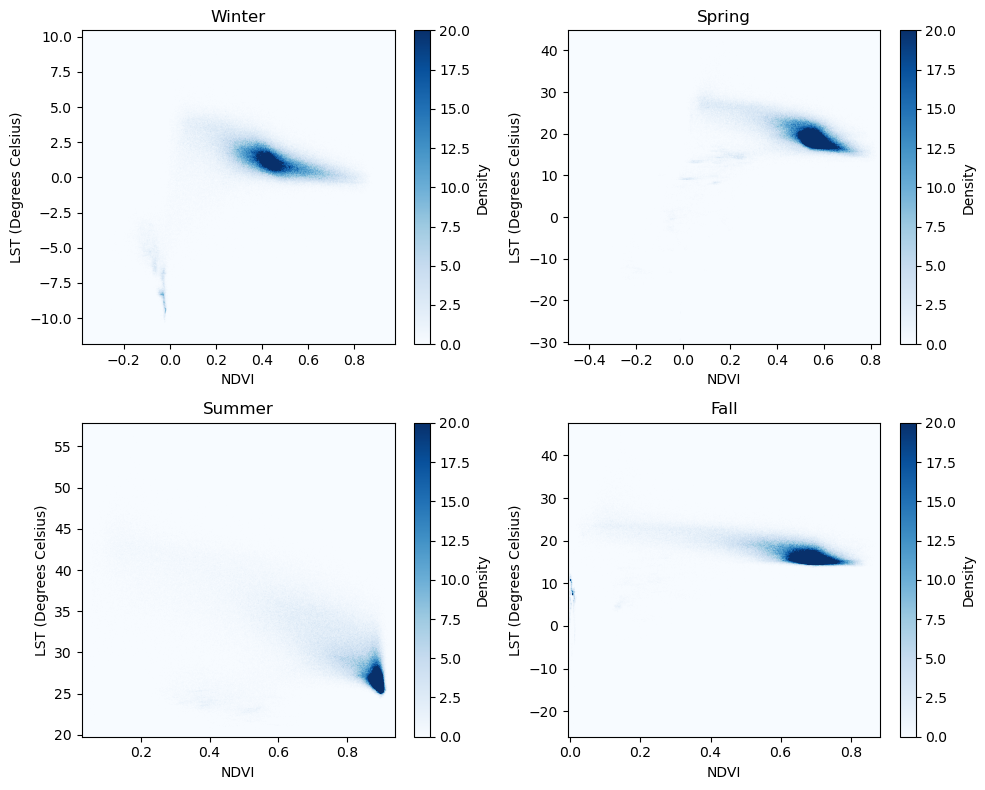

In [8]:
ut.plot(avgNdvi, avgLST)